# Who feeds the world ? And how wealthy are they ?
There are **folium maps** in this notebook. If they do not display well, please **have a look at the `.html` file** from the same repository.

## Abstract <a name="abstract"></a>

Our main goal in this project is to find social and economic world-wide relations of countries based on the state of their agricultural sector, using indicators such as imports, exports, production, self-sufficiency, etc. In order to find such indicators, we would like to use the data from the "Global Food & Agriculture Statistics" datasets. First, we would like to produce a map showing which countries "feed the world" i.e. which countries are net-exporting food. That map would contain a slider to show how this evolved over the past fifty years. Then we would like to show countrywise the level of food self-sufficiency i.e. the way a country does not need to trade with other ones in order to feed its population. We will also compare it to nations' economic development and see if some correlations can be found. We will visualize our best findings with several interactive maps and plots.

## Research questions <a name="abstract2"></a>

We would like to work on the following research questions:

- How does the production and consumption of food look like from a geographical point of view ? Which countries are net food exporters or importers? How did this evolve over the last few decades ?
- What's the level of self-sufficiency in food production of individual countries and how does this change over time ?
- Is there a link between the GDP per capita and the agricultural trade balance ? Are countries that are net exporters or importers richer ? Are self-sufficient countries richer ?
- If we find any relations, are they also still valid if we check for specific crops ? Are there some crops that are mostly produced by richer countries, some that are mostly produced by poorer countries?


# Table of contents <a name="toc"></a>


[Abstract](#abstract)

[Research questions](#abstract2) 

[Table of contents](#toc)

1. [Data cleansing and preprocessing](#1)

    1. [Dataset description](#1A)   
    
    2. [Loading the data set](#1B)
    
    3. [Understanding the data set](#1C)
    
    4. [Cleansing the data set](#1D)
        
    5. [Preprocessing the data set](#1E)
        
    6. [Making one uniformized dataframe](#1F)
        
2. [Data exploration and first observations](#2)
        
    1. [Food productions, importations and exportations](#2A)
            
    2. [Consumer price indices](#2B)  
                
    3. [Structure of international trade and historical context](#2C)      
        
    4. [Economic classification of countries](#2D)    
        
3. [Descriptive data analysis](#3)

    1. [Production and consumption of food from a time-space geography point of view](#3A)

    2. [Food self-sufficiency](#3B)

    3. [Giving countries an economic score based on their agricultural features](#3C)

    4. [Food prices stability and agricultural features](#3D)      

4. [Informed plan for next actions](#4)

**External imports:**

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import folium
import seaborn as sns
import json
import re
import requests
from bs4 import BeautifulSoup
from ipywidgets import interact
from IPython.display import display
import scipy.cluster.hierarchy as spc

**Auxiliary function imports:**

We have implemented some functions into a dedicated module (file `Milestone_2_scripts.py`) in order to simplify the code and make this notebook more enjoyable to read.

In [2]:
#from Milestone_2_scripts import *

**Setup:**

In [3]:
data_folder_path = "./Data/current_FAO/raw_files/"

files = {"Crops production" : "Production_Crops_E_All_Data_(Normalized).csv",
         "Crops trade" : "Trade_Crops_Livestock_E_All_Data_(Normalized).csv", 
         "Consumer price indices" : "ConsumerPriceIndices_E_All_Data_(Normalized).csv",
         "Macroeconomy" : "Macro-Statistics_Key_Indicators_E_All_Data_(Normalized).csv",
         "Livestock production" : "Production_Livestock_E_All_Data_(Normalized).csv",
         "Live animals trade" : "Trade_LiveAnimals_E_All_Data_(Normalized).csv"
        }
interesting_datasets = files.keys()

## 1. Data cleansing and preprocessing <a name="1"></a>

In this part, we will load, explore and clean the dataset in order to remove typing errors, missing information, inaccuracies, and so on.

1. 

    1. [Dataset description](#1A)   
    
    2. [Loading the data set](#1B)
    
    3. [Understanding the data set](#1C)
    
    4. [Cleansing the data set](#1D)
    
        1. [Removing unusefull data](#1Da)         
    
            1. [Extracting GDP from the "Macroeconomy" dataset](#1Dai)
            
            2. [Extracting crops harvested area, production, seed and yield from the "Crops production" dataset](#1Daii)
            
            3. [Extracting stocks production from the "Livestock production" dataset](#1Daiii)
            
            4. [Extracting import and export quantities from the "Live animals trade" and "Crops trade" datasets](#1Daiv)
            5. [Extracting average CPI of each year from the "Consumer price indices" dataset](#1Dav)
            
            6. [Removing areas which are not countries](#1Davi)
        
        2. [Handling of the missing data](#1Db)
        
            1. [Highlighting the problem](#1Dbi)
            
            2. [Proposed correction](#1Dbii)        
        
    5. [Preprocessing the data set](#1E)
    
        1. [Converting country names between different naming conventions](#1Ea)
        
        2. [Normalization and log scales](#1Eb)
        
    6. [Making one uniformized dataframe](#1F)

### 1.A. Dataset description <a name="1A"></a>

Our main dataset would be a subset of the "Global Food & Agriculture Statistics" that is found in the proposed datasets list. In this dataset, we have seen that we could work with the production as well as import and export quantities per year and per country. We will add information about countries GDP to this database.

### 1.B. Loading the data set  <a name="1B"></a>

In [4]:
def load_datasets(datasets) :
    df = {}
    for dataset in datasets :
        file_path = data_folder_path + files[dataset]
        df[dataset] = pd.read_csv(file_path, encoding = "ISO-8859-1")
    return df

We load each interresting dataset in the dictionary `df` :

In [5]:
df = load_datasets(interesting_datasets)

### 1.C. Understanding the data set  <a name="1C"></a>

In this part, we will have a first look of the datasets in order to get a first sense of the data.

In [6]:
def display_df(df, datasets):
    for dataset in datasets :
        display(dataset, df[dataset].sample(5))

In order to see what does the datasets look like, we display a sample of 5 rows for each of them :

In [7]:
display_df(df, interesting_datasets)

'Crops production'

Area Code                     Area  Item Code  \
2404836       5501  Australia & New Zealand        401   
2148444       5207            South America       1717   
587432         238                 Ethiopia         44   
1832713        237                 Viet Nam        780   
2038812       5200                 Americas         44   

                                Item  Element Code         Element  Year Code  \
2404836  Chillies and peppers, green          5312  Area harvested       2006   
2148444                Cereals,Total          5419           Yield       2007   
587432                        Barley          5419           Yield       2002   
1832713                         Jute          5312  Area harvested       1976   
2038812                       Barley          5510      Production       1979   

         Year    Unit       Value Flag  
2404836  2006      ha      2787.0    A  
2148444  2007   hg/ha     36907.0   Fc  
587432   2002   hg/ha     14409.0   Fc  
1832713  1976      ha     14170.0  NaN  
2038812  1979  tonnes  18150705.0    A

'Crops trade'

Area Code        Area  Item Code                          Item  \
6802620         143     Morocco        390                 Juice, tomato   
10549752        227      Tuvalu        631                Waters,ice etc   
2906564          49        Cuba        571  Mangoes, mangosteens, guavas   
11823510       5000       World       1942             Eggs in The Shell   
1718732          35  Cabo Verde        426           Carrots and turnips   

          Element Code          Element  Year Code  Year      Unit     Value  \
6802620           5910  Export Quantity       1982  1982    tonnes       0.0   
10549752          5622     Import Value       1965  1965  1000 US$       NaN   
2906564           5910  Export Quantity       1966  1966    tonnes       NaN   
11823510          5610  Import Quantity       1982  1982    tonnes  823102.0   
1718732           5922     Export Value       1992  1992  1000 US$       NaN   

         Flag  
6802620   NaN  
10549752    M  
2906564     M  
11823510    A  
1718732     M

'Consumer price indices'

Area Code       Area  Item Code  \
17208         63    Estonia      23013   
25356        104    Ireland      23013   
38279        157  Nicaragua      23013   
21236         86    Grenada      23013   
52466        210     Sweden      23012   

                                                Item  Months Code    Months  \
17208     Consumer Prices, Food Indices (2010 = 100)         7012  December   
25356     Consumer Prices, Food Indices (2010 = 100)         7005       May   
38279     Consumer Prices, Food Indices (2010 = 100)         7004     April   
21236     Consumer Prices, Food Indices (2010 = 100)         7008    August   
52466  Consumer Prices, General Indices (2010 = 100)         7003     March   

       Year Code  Year  Unit      Value Flag    Note  
17208       2013  2013   NaN  186.20000    X    1997  
25356       2005  2005   NaN  102.10000    X    2016  
38279       2010  2010   NaN  154.16000    X    2006  
21236       2012  2012   NaN  113.62000    X  2010M1  
52466       2010  2010   NaN   99.62228    X    2010

'Macroeconomy'

Area Code                  Area  Item Code  \
361482        166                Panama      22015   
422412        197          Sierra Leone      22076   
532049       5000                 World      22078   
99766          96  China, Hong Kong SAR      22015   
271711        125         Liechtenstein      22015   

                                                     Item  Element Code  \
361482                      Gross Fixed Capital Formation          6103   
422412  Value Added (Manufacture of food, beverages an...          6114   
532049      Value Added (Manufacture of tobacco products)          6110   
99766                       Gross Fixed Capital Formation          6108   
271711                      Gross Fixed Capital Formation          6155   

                                  Element  Year Code  Year      Unit  \
361482                Share of GDP in US$       2000  2000         %   
422412  Value Local Currency, 2005 prices       1987  1987  millions   
532049                          Value US$       2014  2014  millions   
99766              Value US$, 2005 prices       2010  2010  millions   
271711       Annual growth Local Currency       1989  1989         %   

               Value Flag  
361482     21.185653   Fc  
422412           NaN  NaN  
532049  67093.231345    A  
99766   45229.162934  XAM  
271711      9.767438   Fc

'Livestock production'

Area Code                                     Area  Item Code  \
80965         150                              Netherlands        866   
160678       5817  Net Food Importing Developing Countries        866   
132332       5101                           Eastern Africa       1016   
133830       5103                          Northern Africa       1181   
23161          40                                    Chile       1749   

                   Item  Element Code Element  Year Code  Year  Unit  \
80965            Cattle          5111  Stocks       1974  1974  Head   
160678           Cattle          5111  Stocks       1988  1988  Head   
132332            Goats          5111  Stocks       1970  1970  Head   
133830         Beehives          5114  Stocks       2009  2009    No   
23161   Sheep and Goats          5111  Stocks       1962  1962  Head   

              Value Flag  
80965     4666000.0  NaN  
160678  237296770.0    A  
132332   47918926.0    A  
133830    2674229.0    A  
23161     7596100.0    A

'Live animals trade'

Area Code                         Area  Item Code  \
108945         41              China, mainland       1921   
34609          16                   Bangladesh       1882   
486931        215  United Republic of Tanzania       1057   
398234        244                        Samoa         10   
409076        196                   Seychelles        866   

                           Item  Element Code          Element  Year Code  \
108945          Bovine, Animals          5908  Export Quantity       1992   
34609   Agricult.Products,Total          5622     Import Value       1961   
486931                 Chickens          5622     Import Value       1976   
398234  Total Merchandise Trade          5922     Export Value       1972   
409076                   Cattle          5608  Import Quantity       1981   

        Year      Unit     Value Flag  
108945  1992      Head  166385.0    A  
34609   1961  1000 US$  131771.0    A  
486931  1976  1000 US$    3136.0  NaN  
398234  1972  1000 US$    5011.0  NaN  
409076  1981      Head       0.0  NaN

At first glance, our datasets seem very clean.

Each of our dataset contains a column "Year" and a column that is either named "Area" or "Country". This is a great news for us since we want to do a both geographical and time-related analysis.

The columns "Area" and "Country" both correspond to the country except that the "Area" may contains a group of country (e.g. "Eastern Europe").

### 1.D. Cleansing the data set  <a name="1D"></a>

In this part, we will clean the datasets. The final goal is to produce one uniformized and normalized dataset on which we could work (see [1.F](#1F)).

Such a cleaned dataset may look like this  (in a very simplistic way):

    Country | Year | GDP | Crops production | Livestock production

#### 1.D.a. Removing unuseful data  <a name="1Da"></a>

In this section, we will create dataframes in `df_useful` which correspond to previous dataframes without the unuseful data.

In [8]:
df_useful = {}

##### 1.D.a.i. Extracting GDP from the "Macroeconomy" dataset <a name="1Dai"></a>
The "Macroeconomy" dataset contains many different measures: Gross Fixed Capital Formation, Gross National Income, Value Added (Total Manufacturing), ... We are only interested in Gross Domestic Product. Therefore, we extract it Gross Domestic Product from the "Macroeconomy" dataset. In order to have uniformisation among values, we choose the US$ value. All of them have the same unit (millions US$) so we can drop the "Unit" column as well.

In [9]:
def extract_GDP(df):
    def selection_GDP(df):
        return df['Item']=='Gross Domestic Product'
    def selection_US_dollars(df):
        return df['Element']=="Value US$"
    def drop_columns(df):
        dropped_colmuns = ["Item Code", "Item", "Element Code", "Element", "Flag", "Year Code", "Unit"]
        return df.drop(columns = dropped_colmuns)
    return drop_columns(df[selection_GDP(df)&selection_US_dollars(df)])

In [10]:
df_useful["GDP"] = extract_GDP(df["Macroeconomy"])

We can have have a look at a sample of the extrated dataset:

In [11]:
display(df_useful["GDP"].sample(5))

Area Code                              Area  Year         Value
44038         255                           Belgium  2000  2.379047e+05
201999        175                     Guinea-Bissau  1991  6.494428e+02
383944        117                 Republic of Korea  2005  8.981372e+05
400778        191  Saint Vincent and the Grenadines  1996  3.292766e+02
556569       5404                    Western Europe  1987  2.952139e+06

And we can plot GDP in million US$ for different countries for the period 1970-2015:

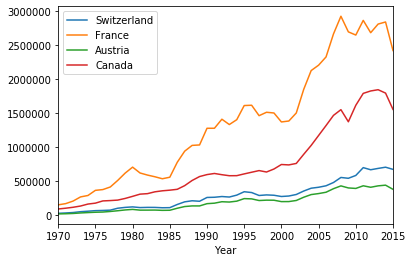

In [12]:
select_switzerland = df_useful["GDP"]['Area']=='Switzerland'
select_france = df_useful["GDP"]['Area']=='France'
select_austria = df_useful["GDP"]['Area']=='Austria'
select_canada = df_useful["GDP"]['Area']=='Canada'
ax = df_useful["GDP"][select_switzerland].plot(x ='Year', y='Value', kind = 'line')
ax = df_useful["GDP"][select_france].plot(x ='Year', y='Value', kind = 'line', ax = ax)
ax = df_useful["GDP"][select_austria].plot(x ='Year', y='Value', kind = 'line', ax = ax)
ax = df_useful["GDP"][select_canada].plot(x ='Year', y='Value', kind = 'line', ax = ax)
ax.legend(["Switzerland", 'France', 'Austria', "Canada"])

For dissolute or new countries, we have some Nan values (before appearing or after dissolution) as in this next example :

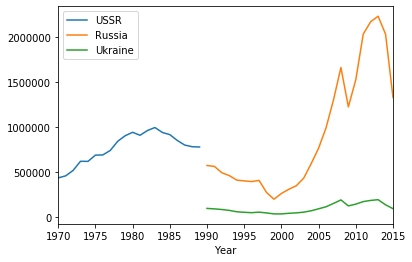

In [13]:
select_USSR = df_useful["GDP"]['Area']=='USSR'
select_russia = df_useful["GDP"]['Area']=='Russian Federation'
select_ukraine = df_useful["GDP"]['Area']=='Ukraine'
ax = df_useful["GDP"][select_USSR].plot(x ='Year', y='Value', kind = 'line')
ax = df_useful["GDP"][select_russia].plot(x ='Year', y='Value', kind = 'line', ax = ax)
ax = df_useful["GDP"][select_ukraine].plot(x ='Year', y='Value', kind = 'line', ax = ax)
ax.legend(["USSR", 'Russia', 'Ukraine'])

##### 1.D.a.ii. Extracting crops harvested area, production, seed and yield from the "Crops production" dataset<a name="1Daii"></a>
We want to extract crops harvested area, production, seed and yield from the "Crops production" dataset. As all crops are not food crops, we request the [World crops database](https://world-crops.com/food-crops/) to keep only the food crops.

In [14]:
def get_food_crops():
    #Return a list of crops categorized as food crops https://world-crops.com/food-crops/
    url="https://world-crops.com/food-crops/"
    r=requests.get(url,headers={"User-Agent": "XY"})
    soup=BeautifulSoup(r.text,'html.parser')
    elements_temp=soup.find_all('a',href=re.compile("^../"))
    elements=[el.text for el in elements_temp]
    
    #only 40 elements are displayed on each page->iterating on the total list
    for i in range(40,401,40):
        url_i=url+"?ss="+str(i)
        r=requests.get(url_i,headers={"User-Agent":"XY"})
        soup=BeautifulSoup(r.text,'html.parser')
        new_elements=soup.find_all('a',href=re.compile("^../"))
        elements+=[el.text for el in new_elements]
    return elements

def inclusive_search(string,elements):
    #returns true if the string can be found in elements. The search removes special characters from string in order to include more positive results
    string=string.lower()
    delimiters = ",", "(","&",")"," and "," "
    pattern = '|'.join(map(re.escape, delimiters))
    strings=list(filter(None,re.split(pattern,string)))
    found=False
    for s in strings:
        if s=="nes":
            continue
        for el in elements:
            found=(s in el.split())
            if found==False and s[-1]=="s":
                found=s[:-1] in el.split()
            if found==False and s[-2:]=="es":
                found=s[:-2] in el.split()
            if found==False and s[-3:]=="ies":
                found=s[:-3]+"y" in el.split()
            if found==True:
                return found
    return found


def get_food_crop_data(df):    
    #extracts the food crop data, returns 4 df: Area,Production,Seed and yield    
    df=df.copy()
    food_crops=list(map(lambda x: x.lower(),get_food_crops()))              
    crop_types_df=df[['Item','Value']].groupby('Item').sum()
    crop_types_df=crop_types_df[list(map(lambda x : inclusive_search(x,food_crops) , crop_types_df.index ))]   
    food_crop_df=df[df.Item.apply(lambda x: x in crop_types_df.index)]
    return (food_crop_df[food_crop_df.Element=='Area harvested'],
            food_crop_df[food_crop_df.Element=='Production'],
            food_crop_df[food_crop_df.Element=='Seed'],
            food_crop_df[food_crop_df.Element=='Yield'])
  
food_crop_area_df , food_crop_production_df , food_crop_seed_df , food_crop_yield_df = get_food_crop_data(df["Crops production"])

In [15]:
df_useful['Crops Area harvested'] = food_crop_area_df.drop(columns=['Item Code', "Element Code", "Element", "Year Code", "Flag"])
df_useful['Crops Production'] = food_crop_production_df.drop(columns=['Item Code', "Element Code", "Element", "Year Code", "Flag"])
df_useful['Crops Seed'] = food_crop_seed_df.drop(columns=['Item Code', "Element Code", "Element", "Year Code", "Flag"])
df_useful['Crops Yield'] =  food_crop_yield_df.drop(columns=['Item Code', "Element Code", "Element", "Year Code", "Flag"])

We check everything is fine by looking at samples for each of the new dataframes:

In [16]:
display(df_useful['Crops Area harvested'].sample(5))
display(df_useful['Crops Production'].sample(5))
display(df_useful['Crops Seed'].sample(5))
display(df_useful['Crops Yield'].sample(5))

Area Code        Area                           Item  Year Unit  \
428316          48  Costa Rica                    Watermelons  2007   ha   
1689586        222     Tunisia  Broad beans, horse beans, dry  1967   ha   
1477146        195     Senegal   Cabbages and other brassicas  1988   ha   
1465948        244       Samoa       Vegetables&Melons, Total  1965   ha   
662068          79     Germany                    Cranberries  1998   ha   

           Value  
428316    1020.0  
1689586  54000.0  
1477146    500.0  
1465948    120.0  
662068       NaN

Area Code          Area                  Item  Year    Unit     Value
67566            1       Armenia                 Pears  2011  tonnes   23039.0
945720         114         Kenya       Plums and sloes  1986  tonnes       NaN
1437610        184        Rwanda  Plantains and others  2011  tonnes       NaN
2258401       5305  Western Asia          Beans, green  2008  tonnes  651853.0
2386791       5500       Oceania               Lentils  1993  tonnes    8018.0

Area Code                      Area                   Item  Year  \
2105255       5204           Central America                  Wheat  1985   
2450408       5706            European Union          Cow peas, dry  2000   
773407          95                  Honduras                  Wheat  2013   
547028          58                   Ecuador  Roots and tubers, nes  1974   
1780879        231  United States of America               Rapeseed  1972   

           Unit     Value  
2105255  tonnes  138764.0  
2450408  tonnes      13.0  
773407   tonnes     193.0  
547028   tonnes    4600.0  
1780879  tonnes       0.0

Area Code                               Area                 Item  \
2338327       5403                    Southern Europe              Bananas   
362080          41                    China, mainland  Pepper (piper spp.)   
2561314       5815  Low Income Food Deficit Countries              Spinach   
982902         121                            Lebanon               Grapes   
1286696        166                             Panama     Fruit, fresh nes   

         Year   Unit     Value  
2338327  1994  hg/ha  376144.0  
362080   1970  hg/ha    2500.0  
2561314  1980  hg/ha   53215.0  
982902   2011  hg/ha   86974.0  
1286696  2000  hg/ha   72000.0

We also make some plots to have a first understanding of the dataset:

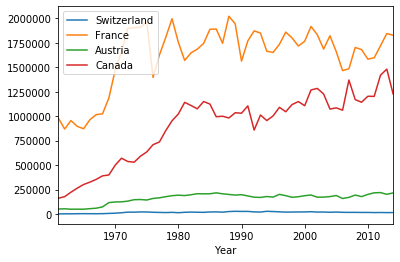

In [17]:
select_Maize = df_useful['Crops Area harvested']['Item']=='Maize'
maize_df = df_useful['Crops Area harvested'][select_Maize]

select_switzerland = maize_df['Area']=='Switzerland'
select_france = maize_df['Area']=='France'
select_austria = maize_df['Area']=='Austria'
select_canada = maize_df['Area']=='Canada'
ax = maize_df[select_switzerland].plot(x ='Year', y='Value', kind = 'line')
ax = maize_df[select_france].plot(x ='Year', y='Value', kind = 'line', ax = ax)
ax = maize_df[select_austria].plot(x ='Year', y='Value', kind = 'line', ax = ax)
ax = maize_df[select_canada].plot(x ='Year', y='Value', kind = 'line', ax = ax)
ax.legend(["Switzerland", 'France', 'Austria', "Canada"])

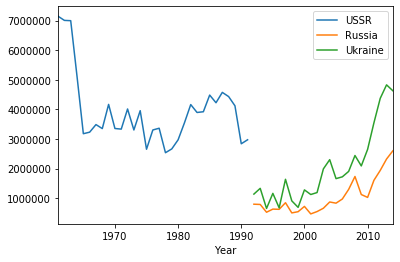

In [18]:
select_USSR = maize_df['Area']=='USSR'
select_russia = maize_df['Area']=='Russian Federation'
select_ukraine = maize_df['Area']=='Ukraine'
ax = maize_df[select_USSR].plot(x ='Year', y='Value', kind = 'line')
ax = maize_df[select_russia].plot(x ='Year', y='Value', kind = 'line', ax = ax)
ax = maize_df[select_ukraine].plot(x ='Year', y='Value', kind = 'line', ax = ax)
ax.legend(["USSR", 'Russia', 'Ukraine'])

##### 1.D.a.iii. Extracting stocks production from the "Livestock production" dataset<a name="1Daiii"></a>

We want to extract stocks production from the "Livestock production" dataset. Again, we drop the columns that are useless for us and have a first look of the data with a sample and some plots.

In [19]:
selection_stocks = df['Livestock production']["Element"] == 'Stocks'
df_useful['Livestock production'] = df['Livestock production'][selection_stocks].drop(columns=['Item Code', "Element Code", "Element", "Year Code", "Flag"])

In [20]:
display(df_useful['Livestock production'].sample(5))

Area Code            Area             Item  Year       Unit      Value
14537          20        Botswana  Sheep and Goats  1975       Head   880000.0
36429          58         Ecuador           Horses  1993       Head   510000.0
128745        251          Zambia             Pigs  2013       Head  1098951.0
110066        209       Swaziland         Chickens  1996  1000 Head      980.0
156057       5706  European Union          Turkeys  1969  1000 Head    17768.0

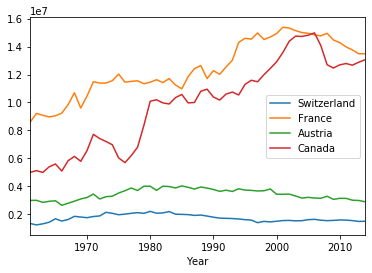

In [21]:
select_pigs = df_useful['Livestock production']['Item']=='Pigs'
pigs_df = df_useful['Livestock production'][select_pigs]

select_switzerland = pigs_df['Area']=='Switzerland'
select_france = pigs_df['Area']=='France'
select_austria = pigs_df['Area']=='Austria'
select_canada = pigs_df['Area']=='Canada'
ax = pigs_df[select_switzerland].plot(x ='Year', y='Value', kind = 'line')
ax = pigs_df[select_france].plot(x ='Year', y='Value', kind = 'line', ax = ax)
ax = pigs_df[select_austria].plot(x ='Year', y='Value', kind = 'line', ax = ax)
ax = pigs_df[select_canada].plot(x ='Year', y='Value', kind = 'line', ax = ax)
ax.legend(["Switzerland", 'France', 'Austria', "Canada"])

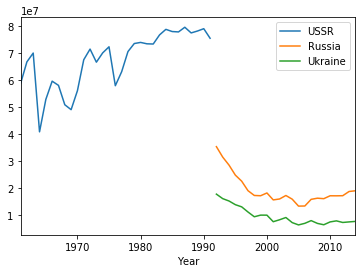

In [22]:
select_USSR = pigs_df['Area']=='USSR'
select_russia = pigs_df['Area']=='Russian Federation'
select_ukraine = pigs_df['Area']=='Ukraine'
ax = pigs_df[select_USSR].plot(x ='Year', y='Value', kind = 'line')
ax = pigs_df[select_russia].plot(x ='Year', y='Value', kind = 'line', ax = ax)
ax = pigs_df[select_ukraine].plot(x ='Year', y='Value', kind = 'line', ax = ax)
ax.legend(["USSR", 'Russia', 'Ukraine'])

##### 1.D.a.iv. Extracting import and export quantities from the "Live animals trade" and "Crops trade" datasets<a name="1Daiv"></a>
Now, we extract import and export quantities from the "Live animals trade" and "Crops trade" datasets, having again some samples and some plots.

In [23]:
selection_import_quantities = df['Live animals trade']["Element"] == 'Import Quantity'
selection_export_quantities = df['Live animals trade']["Element"] == 'Export Quantity'

df_useful['Live animals import quantities'] = df['Live animals trade'][selection_import_quantities].drop(columns=['Item Code', "Element Code", "Element", "Year Code", "Flag"])
df_useful['Live animals export quantities'] = df['Live animals trade'][selection_export_quantities].drop(columns=['Item Code', "Element Code", "Element", "Year Code", "Flag"])

In [24]:
display(df_useful['Live animals import quantities'].sample(5))

Area Code     Area               Item  Year       Unit   Value
97300         351    China          Buffaloes  2007       Head     0.0
151414         58  Ecuador              Mules  2009       Head     NaN
214576         97  Hungary  Rabbits and hares  1979  1000 Head     NaN
185544         79  Germany              Mules  1991       Head    32.0
189251         81    Ghana              Sheep  1988       Head  5000.0

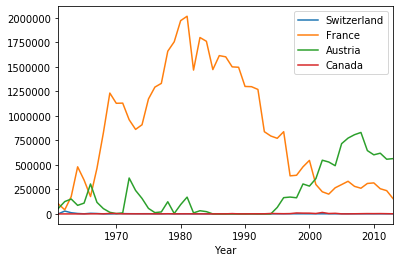

In [25]:
select_pigs = df_useful['Live animals import quantities']['Item']=='Pigs'
pigs_df = df_useful['Live animals import quantities'][select_pigs]

select_switzerland = pigs_df['Area']=='Switzerland'
select_france = pigs_df['Area']=='France'
select_austria = pigs_df['Area']=='Austria'
select_canada = pigs_df['Area']=='Canada'
ax = pigs_df[select_switzerland].plot(x ='Year', y='Value', kind = 'line')
ax = pigs_df[select_france].plot(x ='Year', y='Value', kind = 'line', ax = ax)
ax = pigs_df[select_austria].plot(x ='Year', y='Value', kind = 'line', ax = ax)
ax = pigs_df[select_canada].plot(x ='Year', y='Value', kind = 'line', ax = ax)
ax.legend(["Switzerland", 'France', 'Austria', "Canada"])

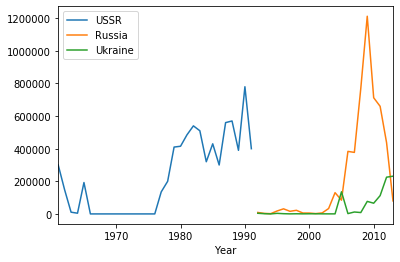

In [26]:
select_USSR = pigs_df['Area']=='USSR'
select_russia = pigs_df['Area']=='Russian Federation'
select_ukraine = pigs_df['Area']=='Ukraine'
ax = pigs_df[select_USSR].plot(x ='Year', y='Value', kind = 'line')
ax = pigs_df[select_russia].plot(x ='Year', y='Value', kind = 'line', ax = ax)
ax = pigs_df[select_ukraine].plot(x ='Year', y='Value', kind = 'line', ax = ax)
ax.legend(["USSR", 'Russia', 'Ukraine'])

In [27]:
display(df_useful['Live animals export quantities'].sample(5))

Area Code                              Area             Item  Year  \
260301        120  Lao People's Democratic Republic        Buffaloes  2010   
542116       5102                     Middle Africa  Bovine, Animals  1980   
389361        188             Saint Kitts and Nevis           Cattle  2003   
529062       5000                             World             Pigs  1964   
602064       5400                            Europe            Ducks  1964   

             Unit      Value  
260301       Head        0.0  
542116       Head   262790.0  
389361       Head        NaN  
529062       Head  2890291.0  
602064  1000 Head        0.0

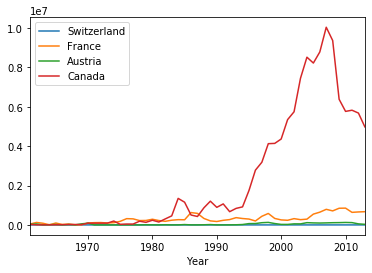

In [28]:
select_pigs = df_useful['Live animals export quantities']['Item']=='Pigs'
pigs_df = df_useful['Live animals export quantities'][select_pigs]

select_switzerland = pigs_df['Area']=='Switzerland'
select_france = pigs_df['Area']=='France'
select_austria = pigs_df['Area']=='Austria'
select_canada = pigs_df['Area']=='Canada'
ax = pigs_df[select_switzerland].plot(x ='Year', y='Value', kind = 'line')
ax = pigs_df[select_france].plot(x ='Year', y='Value', kind = 'line', ax = ax)
ax = pigs_df[select_austria].plot(x ='Year', y='Value', kind = 'line', ax = ax)
ax = pigs_df[select_canada].plot(x ='Year', y='Value', kind = 'line', ax = ax)
ax.legend(["Switzerland", 'France', 'Austria', "Canada"])

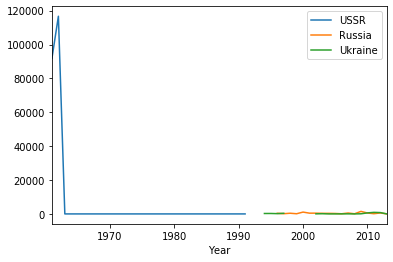

In [29]:
select_USSR = pigs_df['Area']=='USSR'
select_russia = pigs_df['Area']=='Russian Federation'
select_ukraine = pigs_df['Area']=='Ukraine'
ax = pigs_df[select_USSR].plot(x ='Year', y='Value', kind = 'line')
ax = pigs_df[select_russia].plot(x ='Year', y='Value', kind = 'line', ax = ax)
ax = pigs_df[select_ukraine].plot(x ='Year', y='Value', kind = 'line', ax = ax)
ax.legend(["USSR", 'Russia', 'Ukraine'])

In [30]:
selection_import_quantities = df['Crops trade']["Element"] == 'Import Quantity'
selection_export_quantities = df['Crops trade']["Element"] == 'Export Quantity'

df_useful['Crops import quantities'] = df['Crops trade'][selection_import_quantities].drop(columns=['Item Code', "Element Code", "Element", "Year Code", "Flag"])
df_useful['Crops export quantities'] = df['Crops trade'][selection_export_quantities].drop(columns=['Item Code', "Element Code", "Element", "Year Code", "Flag"])

In [31]:
display(df_useful['Crops import quantities'].sample(5))

Area Code                Area                Item  Year    Unit  \
429776          10           Australia            Coconuts  1989  tonnes   
987490          15  Belgium-Luxembourg  Meat Prepared Pres  1984  tonnes   
1755302         35          Cabo Verde                Rice  1992  tonnes   
2104921         40               Chile          Poppy seed  1970  tonnes   
8624747        185  Russian Federation             Tobacco  2010  tonnes   

            Value  
429776     1898.0  
987490    18756.0  
1755302   16867.0  
2104921       NaN  
8624747  258173.0

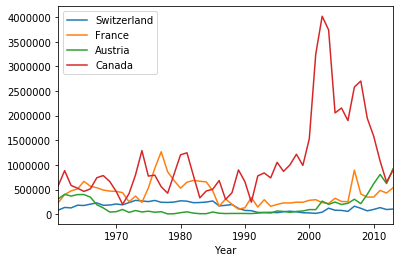

In [32]:
select_Maize = df_useful['Crops import quantities']['Item']=='Maize'
maize_df = df_useful['Crops import quantities'][select_Maize]

select_switzerland = maize_df['Area']=='Switzerland'
select_france = maize_df['Area']=='France'
select_austria = maize_df['Area']=='Austria'
select_canada = maize_df['Area']=='Canada'
ax = maize_df[select_switzerland].plot(x ='Year', y='Value', kind = 'line')
ax = maize_df[select_france].plot(x ='Year', y='Value', kind = 'line', ax = ax)
ax = maize_df[select_austria].plot(x ='Year', y='Value', kind = 'line', ax = ax)
ax = maize_df[select_canada].plot(x ='Year', y='Value', kind = 'line', ax = ax)
ax.legend(["Switzerland", 'France', 'Austria', "Canada"])

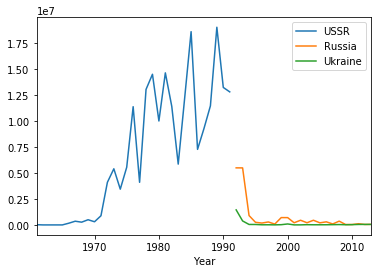

In [33]:
select_USSR = maize_df['Area']=='USSR'
select_russia = maize_df['Area']=='Russian Federation'
select_ukraine = maize_df['Area']=='Ukraine'
ax = maize_df[select_USSR].plot(x ='Year', y='Value', kind = 'line')
ax = maize_df[select_russia].plot(x ='Year', y='Value', kind = 'line', ax = ax)
ax = maize_df[select_ukraine].plot(x ='Year', y='Value', kind = 'line', ax = ax)
ax.legend(["USSR", 'Russia', 'Ukraine'])

In [34]:
display(df_useful['Crops export quantities'].sample(5))

Area Code       Area                       Item  Year    Unit   Value
4496294         89  Guatemala        Vermouths & similar  2010  tonnes     0.0
3902776         68     France     Offals, edible, cattle  1975  tonnes  3581.0
1834826         32   Cameroon  Chillies and peppers, dry  1963  tonnes     1.0
7375166        157  Nicaragua                 Meal, meat  1982  tonnes    41.0
5491871        110      Japan      Feed and meal, gluten  1982  tonnes  6138.0

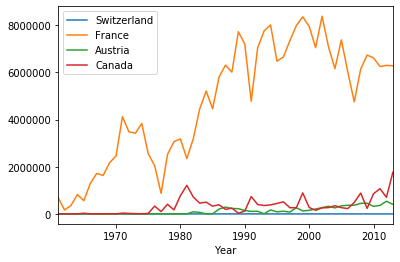

In [35]:
select_Maize = df_useful['Crops export quantities']['Item']=='Maize'
maize_df = df_useful['Crops export quantities'][select_Maize]

select_switzerland = maize_df['Area']=='Switzerland'
select_france = maize_df['Area']=='France'
select_austria = maize_df['Area']=='Austria'
select_canada = maize_df['Area']=='Canada'
ax = maize_df[select_switzerland].plot(x ='Year', y='Value', kind = 'line')
ax = maize_df[select_france].plot(x ='Year', y='Value', kind = 'line', ax = ax)
ax = maize_df[select_austria].plot(x ='Year', y='Value', kind = 'line', ax = ax)
ax = maize_df[select_canada].plot(x ='Year', y='Value', kind = 'line', ax = ax)
ax.legend(["Switzerland", 'France', 'Austria', "Canada"])

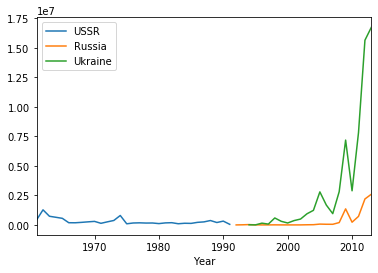

In [36]:
select_USSR = maize_df['Area']=='USSR'
select_russia = maize_df['Area']=='Russian Federation'
select_ukraine = maize_df['Area']=='Ukraine'
ax = maize_df[select_USSR].plot(x ='Year', y='Value', kind = 'line')
ax = maize_df[select_russia].plot(x ='Year', y='Value', kind = 'line', ax = ax)
ax = maize_df[select_ukraine].plot(x ='Year', y='Value', kind = 'line', ax = ax)
ax.legend(["USSR", 'Russia', 'Ukraine'])

##### 1.D.a.v. Extracting average CPI of each year from the "Consumer price indices" dataset<a name="1Dav"></a>

The "Consumer price indices" dataset contains monthly data. In order to have a uniform dataframe, and as other dataframes have yearly data, we group it by (Country, Year) and compute the mean over the monthes.

In [37]:
df_useful['Consumer price indices'] =  df['Consumer price indices'][['Area',"Year",'Value']] \
                                        .dropna() \
                                        .groupby(['Area',"Year"]) \
                                        .mean() \
                                        .reset_index() \
                                        .dropna()

With samples and plots, we remark that this dataset only start in 2000 wheareas other ones start in 1970.

In [38]:
display(df_useful['Consumer price indices'].sample(5))

Area  Year       Value
2979  Tajikistan  2001   39.298600
2677      Serbia  2001   38.528525
1839    Malaysia  2007   92.704678
608         Chad  2008   92.878315
2254        Oman  2016  106.647419

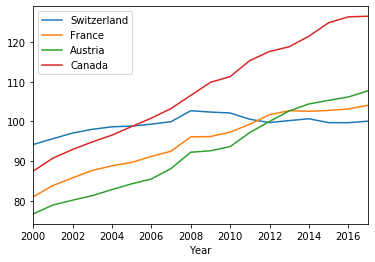

In [39]:
select_switzerland = df_useful['Consumer price indices']['Area']=='Switzerland'
select_france = df_useful['Consumer price indices']['Area']=='France'
select_austria = df_useful['Consumer price indices']['Area']=='Austria'
select_canada = df_useful['Consumer price indices']['Area']=='Canada'
ax = df_useful['Consumer price indices'][select_switzerland].plot(x ='Year', y='Value', kind = 'line')
ax = df_useful['Consumer price indices'][select_france].plot(x ='Year', y='Value', kind = 'line', ax = ax)
ax = df_useful['Consumer price indices'][select_austria].plot(x ='Year', y='Value', kind = 'line', ax = ax)
ax = df_useful['Consumer price indices'][select_canada].plot(x ='Year', y='Value', kind = 'line', ax = ax)
ax.legend(["Switzerland", 'France', 'Austria', "Canada"])

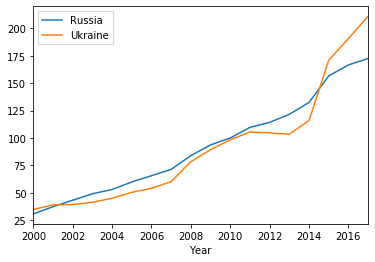

In [40]:
select_russia = df_useful["Consumer price indices"]['Area']=='Russian Federation'
select_ukraine = df_useful["Consumer price indices"]['Area']=='Ukraine'
ax = df_useful["Consumer price indices"][select_russia].plot(x ='Year', y='Value', kind = 'line')
ax = df_useful["Consumer price indices"][select_ukraine].plot(x ='Year', y='Value', kind = 'line', ax = ax)
ax.legend(['Russia', 'Ukraine'])

##### 1.D.a.vi. Removing areas which are not countries <a name="1Davi"></a>

Having a more detailled look at the dataset, we have remarked that the areas which are real countries are exactely the ones with an "Area Code" below $5000$ but not in $[261, 269]$.

In [41]:
#remove Area code >= 5000 or in [261, 269] (EU)
for df_name in df_useful :
    if 'Area Code' in df_useful[df_name].keys() : 
        print ("Removing areas which are not countries in", df_name)
        selection_countries = df_useful[df_name]['Area Code']<261 
        selection_countries = selection_countries | df_useful[df_name]['Area Code']>269
        selection_countries = selection_countries & df_useful[df_name]['Area Code']<5000
        df_useful[df_name] = df_useful[df_name][selection_countries]
        display(df_useful[df_name].sample(5))
    else :
        print (df_name, "is already clean")

Removing areas which are not countries in GDP


Area Code                              Area  Year          Value
511342        155                           Vanuatu  2002     264.219504
268496        124                             Libya  1973    8003.296604
376277        174                          Portugal  2009  243731.066790
400770        191  Saint Vincent and the Grenadines  1988     193.975441
189370         84                            Greece  2010  299361.576560

Removing areas which are not countries in Crops Area harvested


Area Code                        Area                       Item  \
833764         102  Iran (Islamic Republic of)                   Rapeseed   
315756          40                       Chile     Peaches and nectarines   
53593            9                   Argentina  Chillies and peppers, dry   
1060633        133                        Mali     Karite nuts (sheanuts)   
191573          80      Bosnia and Herzegovina                     Garlic   

         Year Unit     Value  
833764   2005   ha  161000.0  
315756   1986   ha   15160.0  
53593    1967   ha    1700.0  
1060633  1973   ha   32000.0  
191573   2000   ha    1889.0

Removing areas which are not countries in Crops Production


Area Code                       Area                       Item  \
212947          21                     Brazil         Citrus Fruit,Total   
1352864        173                     Poland            Plums and sloes   
2293211       5400                     Europe                  Peas, dry   
2472966       5801  Least Developed Countries  Cauliflowers and broccoli   
853811         104                    Ireland        Carrots and turnips   

         Year    Unit       Value  
212947   2004  tonnes  20530052.0  
1352864  1974  tonnes    138000.0  
2293211  1979  tonnes   3807830.0  
2472966  2006  tonnes    138924.0  
853811   2003  tonnes     23000.0

Removing areas which are not countries in Crops Seed


Area Code             Area            Item  Year    Unit    Value
2317129       5401   Eastern Europe     Rice, paddy  1968  tonnes  90969.0
1026565        129       Madagascar       Peas, dry  1993  tonnes    330.0
359672          41  China, mainland          Millet  1996  tonnes  50464.0
1049768        131         Malaysia  Sweet potatoes  2010  tonnes   2006.0
172256          18           Bhutan        Soybeans  1970  tonnes      0.0

Removing areas which are not countries in Crops Yield


Area Code                                     Area         Item  \
2583672       5817  Net Food Importing Developing Countries  Onions, dry   
56177            9                                Argentina        Maize   
977030         119                                   Latvia     Rapeseed   
2147758       5207                            South America         Yams   
1197927        153                            New Caledonia        Wheat   

         Year   Unit     Value  
2583672  2001  hg/ha  134112.0  
56177    1967  hg/ha   24663.0  
977030   2005  hg/ha   20406.0  
2147758  1969  hg/ha   82201.0  
1197927  1994  hg/ha   20571.0

Removing areas which are not countries in Livestock production


Area Code                        Area               Item  Year  \
57162        102  Iran (Islamic Republic of)             Camels  2007   
84700        159                     Nigeria             Cattle  1977   
20295         33                      Canada           Chickens  1961   
26885        214   China, Taiwan Province of      Poultry Birds  2014   
39415         63                     Estonia  Rabbits and hares  2004   

            Unit       Value  
57162       Head    152000.0  
84700       Head  11223000.0  
20295  1000 Head     69962.0  
26885  1000 Head    101652.0  
39415  1000 Head        43.0

Removing areas which are not countries in Live animals import quantities


Area Code              Area       Item  Year  Unit    Value
332977        158             Niger      Goats  1984  Head  14400.0
369240        174          Portugal   Beehives  1976    No      NaN
561610       5203  Northern America     Horses  1970  Head  18015.0
622986       5500           Oceania  Buffaloes  1970  Head      NaN
547324       5104   Southern Africa      Asses  1994  Head     40.0

Removing areas which are not countries in Live animals export quantities


Area Code                                     Area    Item  Year  \
661168       5817  Net Food Importing Developing Countries   Mules  1973   
241813        109                                  Jamaica    Pigs  1974   
274494        256                               Luxembourg   Goats  2013   
315336        149                                    Nepal   Ducks  1976   
54024          19         Bolivia (Plurinational State of)  Horses  1984   

             Unit  Value  
661168       Head    0.0  
241813       Head    0.0  
274494       Head    0.0  
315336  1000 Head    NaN  
54024        Head    0.0

Removing areas which are not countries in Crops import quantities


Area Code                       Area              Item  Year    Unit  \
256046           8        Antigua and Barbuda            Onions  1964  tonnes   
7766284        165                   Pakistan          Coconuts  1971  tonnes   
9888073        210                     Sweden   Wool, degreased  1962  tonnes   
3040094        167                    Czechia           Spinach  2011  tonnes   
2464859        214  China, Taiwan Province of  Juice, fruit nes  1985  tonnes   

          Value  
256046    237.0  
7766284    24.0  
9888073  4100.0  
3040094   442.0  
2464859  3452.0

Removing areas which are not countries in Crops export quantities


Area Code                              Area                 Item  \
7879043         166                            Panama  Vermouths & similar   
14225097       5802  Land Locked Developing Countries         Cocoa, paste   
3541203          60                       El Salvador      Plums and sloes   
29844             3                           Albania       Cherries, sour   
10119713        216                          Thailand   Rubber natural dry   

          Year    Unit      Value  
7879043   1999  tonnes        0.0  
14225097  1993  tonnes        0.0  
3541203   1976  tonnes        NaN  
29844     1966  tonnes        NaN  
10119713  2008  tonnes  1995524.0

Consumer price indices is already clean


#### 1.D.b. Handling of the missing data  <a name="1Db"></a>

In this section, we will explain how we will handle the missing data in previous dataframes for maps.

##### 1.D.b.i. Highlighting the problem  <a name="1Dbi"></a> 

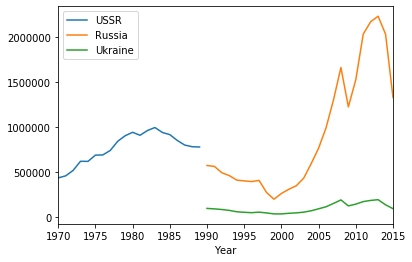

In [42]:
select_USSR = df_useful["GDP"]['Area']=='USSR'
select_russia = df_useful["GDP"]['Area']=='Russian Federation'
select_ukraine = df_useful["GDP"]['Area']=='Ukraine'
ax = df_useful["GDP"][select_USSR].plot(x ='Year', y='Value', kind = 'line')
ax = df_useful["GDP"][select_russia].plot(x ='Year', y='Value', kind = 'line', ax = ax)
ax = df_useful["GDP"][select_ukraine].plot(x ='Year', y='Value', kind = 'line', ax = ax)
ax.legend(["USSR", 'Russia', 'Ukraine'])

In order to vizualize folium maps, we need to associate each country a value. The geojson file that we use is not timestamped and only countries that exist nowadays are inside it. As some countries has been dissolved during the past 50 years, our folium maps won't be complete. For instance, we do not have any value for Ukraine from 1970 to 1989. Our idea to fix this issue is presented in the next paragraph.

##### 1.D.b.ii. Proposed correction  <a name="1Dbii"></a> 


Our idea is to map the former country value to each of the current ones. For instance in 1982, USSR GDP is around one trillion $. Therefore, if we associate (only for folium map purposes) this value to each current country that succeeded USSR, all these countries will appear the same color in the folium map, i.e. all the USSR area will appear the same color (and the good one).

In order to do so, one need to identify which countries appeared and disappeared from the dataset and at which year. Then we will use this result along with some historical research in our `visualise_world_data_folium` function ([1Ea](#1Ea)).

In [43]:
countries_formation_years = {}
for country in df_useful["GDP"]["Area"].unique():
    selection = df_useful["GDP"]["Area"] == country
    year_in, year_out = df_useful["GDP"][selection].dropna()["Year"].min(), df_useful["GDP"][selection].dropna()["Year"].max()
    for year in (year_in, year_out):
        if year not in countries_formation_years :
            countries_formation_years[year] = []
    countries_formation_years[year_in].append((country,'+'))
    countries_formation_years[year_out].append((country,'-'))

countries_formation_years.pop(1970)
countries_formation_years.pop(2015)
for year in sorted(list(countries_formation_years)):
    print (year, countries_formation_years[year])

1988 [('Yemen Ar Rp', '-'), ('Yemen Dem', '-')]
1989 [('Czechoslovakia', '-'), ('Ethiopia PDR', '-'), ('USSR', '-'), ('Yemen', '+'), ('Yugoslav SFR', '-')]
1990 [('Armenia', '+'), ('Azerbaijan', '+'), ('Belarus', '+'), ('Bosnia and Herzegovina', '+'), ('Croatia', '+'), ('Czechia', '+'), ('Eritrea', '+'), ('Estonia', '+'), ('Ethiopia', '+'), ('Georgia', '+'), ('Kazakhstan', '+'), ('Kyrgyzstan', '+'), ('Latvia', '+'), ('Lithuania', '+'), ('Montenegro', '+'), ('Republic of Moldova', '+'), ('Russian Federation', '+'), ('Serbia', '+'), ('Slovakia', '+'), ('Slovenia', '+'), ('Tajikistan', '+'), ('The former Yugoslav Republic of Macedonia', '+'), ('Timor-Leste', '+'), ('Turkmenistan', '+'), ('Ukraine', '+'), ('Uzbekistan', '+'), ('Central Asia', '+')]
1999 [('Kosovo', '+')]
2005 [('Curaçao', '+'), ('Sint Maarten (Dutch Part)', '+')]
2007 [('Sudan (former)', '-')]
2008 [('South Sudan', '+'), ('Sudan', '+')]
2012 [('Netherlands Antilles (former)', '-')]


### 1.E. Preprocessing the data set  <a name="1E"></a>

In this part, we will finish prepocessing the datasets. More precisely, we will deal with country names and normalizing the features.

#### 1.E.a. Converting country names between different naming conventions  <a name="1Ea"></a>
Some countries have different names in the geojson file and in the dataset. We first start by correcting them.

In [44]:
dic = {'Czechia': "Czech Republic",
       'Russian Federation':'Russia',
       "Serbia":"Republic of Serbia",
       'The former Yugoslav Republic of Macedonia':'Macedonia',
       'China, mainland':'China',
       'Viet Nam':'Vietnam',
       'Venezuela (Bolivarian Republic of)':'Venezuela',
       'Iran (Islamic Republic of)':'Iran',
       'Syrian Arab Republic':"Syria",
       'Bolivia (Plurinational State of)': 'Bolivia',
       "Côte d'Ivoire": "Ivory Coast",
       'Congo':"Republic of the Congo",
       "Lao People's Democratic Republic":'Laos',
       "Democratic People's Republic of Korea":"North Korea",
       'Republic of Korea':"South Korea"}

def correct_country_names(old_name):
    if old_name in dic.keys() :
        return dic[old_name]
    return old_name


In [45]:
for df_name in df_useful :
    print (df_name)
    df_useful[df_name]["Area"] = df_useful[df_name]["Area"].apply(correct_country_names)

GDP
Crops Area harvested
Crops Production
Crops Seed
Crops Yield
Livestock production
Live animals import quantities
Live animals export quantities
Crops import quantities
Crops export quantities
Consumer price indices


Then, we do a function that takes as input a dataframe and a year and produces the corresponding folium map. This function also handles dissolutions of countries as suggested [before](#1Dbii).

In [46]:
def visualise_world_data_folium(df, year, logScale=True):
    dic = {'USSR':                            ['Armenia', 'Azerbaijan','Belarus', 'Estonia', 'Georgia',
                                               'Kazakhstan', 'Kyrgyzstan', 'Latvia', 'Lithuania',
                                               'Montenegro', 'Republic of Moldova', 'Russia',
                                               'Republic of Serbia', 'Timor-Leste', 'Turkmenistan', 'Ukraine',
                                               'Uzbekistan'],
           'Ethiopia PDR':                     ['Eritrea','Ethiopia'],
           'Yugoslav SFR':                     ['Kosovo', 'Slovenia', 'Croatia',
                                                'Macedonia', 'Bosnia and Herzegovina'],
           'Yemen Dem' :                       ['Yemen'],        
           'Czechoslovakia':                   ["Czech Republic", 'Slovakia'],
           'Netherlands Antilles (former)':    ['Curaçao', 'Sint Maarten (Dutch Part)'],
           'Sudan (former)':                   ['South Sudan', 'Sudan']
          }
    def add_new_names(old_name):
        if old_name in dic.keys() :
            return dic[old_name]
        return old_name
    to_plot=df[df["Year"]==year]
    to_plot=(to_plot[['Area','Value']]
             .dropna()
             .groupby('Area')             
             .mean()
             .reset_index()
             .dropna())    
    to_plot['Area']=to_plot['Area'].apply(add_new_names)
    to_plot = to_plot.explode('Area')
    if logScale :
        to_plot.Value=np.log10(to_plot.Value)
    
    m = folium.Map(location=[40,-10],zoom_start=1.6)
    folium.Choropleth(
        geo_data=f"https://raw.githubusercontent.com/python-visualization/folium/master/examples/data/world-countries.json",
        data=to_plot,
        columns=['Area', 'Value'],
        key_on='feature.properties.name',
        fill_color='YlGn',fill_opacity=0.7,line_opacity=0.2,nan_fill_opacity=0.0
    ).add_to(m)

    folium.LayerControl().add_to(m)

    return(m)

We can know use it to produce some maps. For instance, we plot below the map of GDP for the year 1985 (befor edissolution of USSR).

In [47]:
display(visualise_world_data_folium(df_useful["GDP"], 1985, True))

#### 1.E.b. Normalization and log scales  <a name="1Eb"></a>

Some of our features seem to be right skewed. At first glance it seems that they look like power laws.

For instance the distribution of GDP look a bit like a power law:

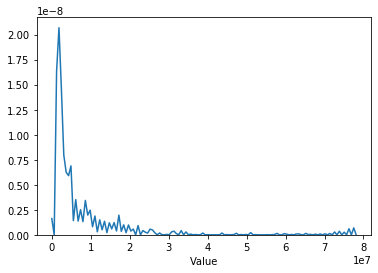

In [48]:
sns.distplot(df_useful["GDP"]["Value"], rug=False, hist=False)

As we later want to train some Machine Learning models, we log those values so that their distribution look a bit more like a normal distribution.

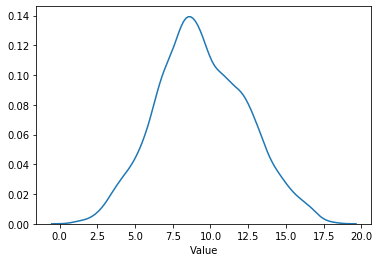

In [49]:
#looks better with log scale
sns.distplot(np.log(df_useful["GDP"]["Value"]), rug=False, hist=False)

The new distribution indeed looks better to train models on it.

### 1.F. Making one uniformized dataframe  <a name="1F"></a>

In this part, we will make one uniformized dataframe `uni_df` with the following columns.


    Country | Year | GDP | Crops production columns | Livestock production columns | Crops importation columns | Livestock importation columns | Crops exportation columns | Livestock exportation columns | CPI
    
In this uniformized dataframe, a tuple `(Country, Year)` uniquely identifies a row.


#### 1.F.a. Pivoting dataframes with items  <a name="1Fa"></a>

The current dataframes have several rows for a given `(Country, Year)`. Each of this row correspond to one item. We would like to have a unique row for a given `(Country, Year)` and one column per item:

In [50]:
need_pivot = ['Crops Area harvested',
              'Crops Production',
              'Crops Seed',
              'Crops Yield',
              'Livestock production',
              'Live animals import quantities',
              'Live animals export quantities',
              'Crops import quantities',
              'Crops export quantities']

def rename_columns(x, word):
    if x not in ['Area', 'Year', 'ha', 'tonnes', 'hg/ha', 'Head', '1000 Head']:
        return x + ' ' + word
    return x

df_useful['GDP'] = df_useful['GDP'].rename(columns = {'Value':'(GDP, million $)'})[["Area",'Year','(GDP, million $)']]
df_useful['Consumer price indices'] = df_useful['Consumer price indices'].rename(columns = {'Value':'(Consumer price indices, %)'})[["Area",'Year','(Consumer price indices, %)']]

for df_name in need_pivot :
    df_useful[df_name] = pd.pivot_table(df_useful[df_name], index=["Area",'Year'], columns=["Item","Unit"], values="Value").rename(columns=lambda x: rename_columns(x, df_name))
    display(df_useful[df_name].sample(5))

Item                                  Anise, badian, fennel, coriander Crops Area harvested  \
Unit                                                                                     ha   
Area                             Year                                                         
Saint Vincent and the Grenadines 1986                                                NaN      
New Zealand                      1994                                                NaN      
Haiti                            1972                                                NaN      
European Union                   1995                                            24599.0      
Israel                           1976                                                NaN      

Item                                  Apples Crops Area harvested  \
Unit                                                           ha   
Area                             Year                               
Saint Vincent and the Grenadines 1986                       150.0   
New Zealand                      1994                     15257.0   
Haiti                            1972                         NaN   
European Union                   1995                    696242.0   
Israel                           1976                      2740.0   

Item                                  Apricots Crops Area harvested  \
Unit                                                             ha   
Area                             Year                                 
Saint Vincent and the Grenadines 1986                           NaN   
New Zealand                      1994                         844.0   
Haiti                            1972                           NaN   
European Union                   1995                       85802.0   
Israel                           1976                         670.0   

Item                                  Areca nuts Crops Area harvested  \
Unit                                                               ha   
Area                             Year                                   
Saint Vincent and the Grenadines 1986                             NaN   
New Zealand                      1994                             NaN   
Haiti                            1972                             NaN   
European Union                   1995                             NaN   
Israel                           1976                             NaN   

Item                                  Artichokes Crops Area harvested  \
Unit                                                               ha   
Area                             Year                                   
Saint Vincent and the Grenadines 1986                             NaN   
New Zealand                      1994                             NaN   
Haiti                            1972                             NaN   
European Union                   1995                         85937.0   
Israel                           1976                           450.0   

Item                                  Asparagus Crops Area harvested  \
Unit                                                              ha   
Area                             Year                                  
Saint Vincent and the Grenadines 1986                            NaN   
New Zealand                      1994                         3200.0   
Haiti                            1972                            NaN   
European Union                   1995                        59568.0   
Israel                           1976                            NaN   

Item                                  Avocados Crops Area harvested  \
Unit                                                             ha   
Area                             Year                                 
Saint Vincent and the Grenadines 1986                           NaN   
New Zealand                      1994                        1375.0   
Haiti          

Item                   Anise, badian, fennel, coriander Crops Production  \
Unit                                                              tonnes   
Area              Year                                                     
Latvia            2014                                               NaN   
Cyprus            1970                                              10.0   
Melanesia         2002                                               NaN   
Austria           2006                                               NaN   
Equatorial Guinea 2001                                               NaN   

Item                   Apples Crops Production Apricots Crops Production  \
Unit                                    tonnes                    tonnes   
Area              Year                                                     
Latvia            2014                  9623.0                       NaN   
Cyprus            1970                  7518.0                    2032.0   
Melanesia         2002                     NaN                       NaN   
Austria           2006                509139.0                   25203.0   
Equatorial Guinea 2001                     NaN                       NaN   

Item                   Areca nuts Crops Production  \
Unit                                        tonnes   
Area              Year                               
Latvia            2014                         NaN   
Cyprus            1970                         NaN   
Melanesia         2002                         NaN   
Austria           2006                         NaN   
Equatorial Guinea 2001                         NaN   

Item                   Artichokes Crops Production Asparagus Crops Production  \
Unit                                        tonnes                     tonnes   
Area              Year                                                          
Latvia            2014                         NaN                        NaN   
Cyprus            1970                      5080.0                        NaN   
Melanesia         2002                         NaN                        NaN   
Austria           2006                         NaN                     2161.0   
Equatorial Guinea 2001                         NaN                        NaN   

Item                   Avocados Crops Production  \
Unit                                      tonnes   
Area              Year                             
Latvia            2014                       NaN   
Cyprus            1970                      55.0   
Melanesia         2002                       NaN   
Austria           2006                       NaN   
Equatorial Guinea 2001                       NaN   

Item                   Bambara beans Crops Production  \
Unit                                           tonnes   
Area              Year                                  
Latvia            2014                            NaN   
Cyprus            1970                            NaN   
Melanesia         2002                            NaN   
Austria           2006                            NaN   
Equatorial Guinea 2001                            NaN   

Item                   Bananas Crops Production Barley Crops Production  ...  \
Unit                                     tonnes                  tonnes  ...   
Area              Year                                                   ...   
Latvia            2014                      NaN                418800.0  ...   
Cyprus            1970                   2540.0                 55880.0  ...   
Melanesia         2002                 878498.0                     NaN  ...   
Austria           2006                      NaN                914052.0  ...   
Equatorial Guinea 2001                  22570.0                     NaN  ...   

Item                   Sweet potatoes Crops Production  \
Unit                                            tonnes   
Area              Year                                   
Latvia     

Item                                   Anise, badian, fennel, coriander Crops Seed  \
Unit                                                                        tonnes   
Area                              Year                                               
Paraguay                          2013                                         NaN   
Greece                            1966                                         NaN   
Morocco                           1994                                         NaN   
Low Income Food Deficit Countries 2014                                         NaN   
Ecuador                           1975                                         NaN   

Item                                   Bambara beans Crops Seed  \
Unit                                                     tonnes   
Area                              Year                            
Paraguay                          2013                      NaN   
Greece                            1966                      NaN   
Morocco                           1994                      NaN   
Low Income Food Deficit Countries 2014                  18029.0   
Ecuador                           1975                      NaN   

Item                                   Bananas Crops Seed Barley Crops Seed  \
Unit                                               tonnes            tonnes   
Area                              Year                                        
Paraguay                          2013                NaN               NaN   
Greece                            1966                NaN           49174.0   
Morocco                           1994                NaN          126280.0   
Low Income Food Deficit Countries 2014                NaN          354914.0   
Ecuador                           1975                NaN            7160.0   

Item                                   Beans, dry Crops Seed  \
Unit                                                  tonnes   
Area                              Year                         
Paraguay                          2013                4200.0   
Greece                            1966                7128.0   
Morocco                           1994                 605.0   
Low Income Food Deficit Countries 2014              633806.0   
Ecuador                           1975                2581.0   

Item                                   Broad beans, horse beans, dry Crops Seed  \
Unit                                                                     tonnes   
Area                              Year                                            
Paraguay                          2013                                   1437.0   
Greece                            1966                                   3182.0   
Morocco                           1994                                   5900.0   
Low Income Food Deficit Countries 2014                                  41161.0   
Ecuador                           1975                                    719.0   

Item                                   Buckwheat Crops Seed  \
Unit                                                 tonnes   
Area                              Year                        
Paraguay                          2013                  NaN   
Greece                            1966                  NaN   
Morocco                           1994                  NaN   
Low Income Food Deficit Countries 2014                  0.0   
Ecuador                           1975                  NaN   

Item                                   Cabbages and other brassicas Crops Seed  \
Unit                                                                    tonnes   
Area                              Year                                           
Paraguay                          2013                                     NaN   
Greece                            1966                                     NaN   
Morocco                           1994          

Item                     Anise, badian, fennel, coriander Crops Yield  \
Unit                                                            hg/ha   
Area                Year                                                
Niger               1977                                          NaN   
Antigua and Barbuda 1995                                          NaN   
Canada              1986                                          NaN   
Guadeloupe          1964                                          NaN   
Southern Africa     1997                                          NaN   

Item                     Apples Crops Yield Apricots Crops Yield  \
Unit                                  hg/ha                hg/ha   
Area                Year                                           
Niger               1977                NaN                  NaN   
Antigua and Barbuda 1995                NaN                  NaN   
Canada              1986           155270.0              49787.0   
Guadeloupe          1964                NaN                  NaN   
Southern Africa     1997           254822.0             165397.0   

Item                     Areca nuts Crops Yield Artichokes Crops Yield  \
Unit                                      hg/ha                  hg/ha   
Area                Year                                                 
Niger               1977                    NaN                    NaN   
Antigua and Barbuda 1995                    NaN                    NaN   
Canada              1986                    NaN                    NaN   
Guadeloupe          1964                    NaN                    NaN   
Southern Africa     1997                    NaN                    NaN   

Item                     Asparagus Crops Yield Avocados Crops Yield  \
Unit                                     hg/ha                hg/ha   
Area                Year                                              
Niger               1977                   NaN                  NaN   
Antigua and Barbuda 1995                   NaN                  NaN   
Canada              1986               15148.0                  NaN   
Guadeloupe          1964                   NaN                  NaN   
Southern Africa     1997                   NaN              82932.0   

Item                     Bambara beans Crops Yield Bananas Crops Yield  \
Unit                                         hg/ha               hg/ha   
Area                Year                                                 
Niger               1977                       NaN                 NaN   
Antigua and Barbuda 1995                       NaN            115610.0   
Canada              1986                       NaN                 NaN   
Guadeloupe          1964                       NaN            205323.0   
Southern Africa     1997                       NaN            121729.0   

Item                     Barley Crops Yield  ... Sweet potatoes Crops Yield  \
Unit                                  hg/ha  ...                      hg/ha   
Area                Year                     ...                              
Niger               1977                NaN  ...                    65556.0   
Antigua and Barbuda 1995                NaN  ...                    58333.0   
Canada              1986            30170.0  ...                        NaN   
Guadeloupe          1964                NaN  ...                   130000.0   
Southern Africa     1997            13378.0  ...                    36776.0   

Item                     Tangerines, mandarins, clementines, satsumas Crops Yield  \
Unit                                                                        hg/ha   
Area                Year                                                            
Niger               1977                                                NaN         
Antigua and Barbuda 1995                                                NaN         
Canada              1986                                 

Item                           Animals live nes Livestock production  \
Unit                                                            Head   
Area                      Year                                         
Tokelau                   1976                                   NaN   
Ethiopia PDR              1988                                   NaN   
Least Developed Countries 2009                                   NaN   
Italy                     1999                                   NaN   
Czech Republic            2009                                   NaN   

Item                           Asses Livestock production  \
Unit                                                 Head   
Area                      Year                              
Tokelau                   1976                        NaN   
Ethiopia PDR              1988                  4800000.0   
Least Developed Countries 2009                 13757803.0   
Italy                     1999                    23000.0   
Czech Republic            2009                        NaN   

Item                           Beehives Livestock production  \
Unit                                 No Livestock production   
Area                      Year                                 
Tokelau                   1976                           NaN   
Ethiopia PDR              1988                     3750000.0   
Least Developed Countries 2009                    11380779.0   
Italy                     1999                      900000.0   
Czech Republic            2009                      497946.0   

Item                           Buffaloes Livestock production  \
Unit                                                     Head   
Area                      Year                                  
Tokelau                   1976                            NaN   
Ethiopia PDR              1988                            NaN   
Least Developed Countries 2009                     10881477.0   
Italy                     1999                       200000.0   
Czech Republic            2009                            NaN   

Item                           Camelids, other Livestock production  \
Unit                                                           Head   
Area                      Year                                        
Tokelau                   1976                                  NaN   
Ethiopia PDR              1988                                  NaN   
Least Developed Countries 2009                                  NaN   
Italy                     1999                                  NaN   
Czech Republic            2009                                  NaN   

Item                           Camels Livestock production  \
Unit                                                  Head   
Area                      Year                               
Tokelau                   1976                         NaN   
Ethiopia PDR              1988                   1030000.0   
Least Developed Countries 2009                  18636646.0   
Italy                     1999                         NaN   
Czech Republic            2009                         NaN   

Item                           Cattle Livestock production  \
Unit                                                  Head   
Area                      Year                               
Tokelau                   1976                         NaN   
Ethiopia PDR              1988                  27000000.0   
Least Developed Countries 2009                 260250659.0   
Italy                     1999                   7129000.0   
Czech Republic            2009                   1349286.0   

Item                           Cattle and Buffaloes Livestock production  \
Unit                                                                Head   
Area                      Year                                             
Tokelau                   1976                                       NaN   
Ethiopia PDR              1988   

Item                                  Animals live nes Live animals import quantities  \
Unit                                                                             Head   
Area                             Year                                                   
Democratic Republic of the Congo 2009                                             0.0   
British Virgin Islands           1980                                             NaN   
Tonga                            1962                                             NaN   
Poland                           1961                                             NaN   
Tonga                            1999                                             NaN   

Item                                  Asses Live animals import quantities  \
Unit                                                                  Head   
Area                             Year                                        
Democratic Republic of the Congo 2009                                  NaN   
British Virgin Islands           1980                                  NaN   
Tonga                            1962                                  NaN   
Poland                           1961                                  NaN   
Tonga                            1999                                  NaN   

Item                                  Beehives Live animals import quantities  \
Unit                                        No Live animals import quantities   
Area                             Year                                           
Democratic Republic of the Congo 2009                                     NaN   
British Virgin Islands           1980                                     NaN   
Tonga                            1962                                     NaN   
Poland                           1961                                     NaN   
Tonga                            1999                                     NaN   

Item                                  Bovine, Animals Live animals import quantities  \
Unit                                                                            Head   
Area                             Year                                                  
Democratic Republic of the Congo 2009                                         4269.0   
British Virgin Islands           1980                                            0.0   
Tonga                            1962                                            0.0   
Poland                           1961                                          700.0   
Tonga                            1999                                            0.0   

Item                                  Buffaloes Live animals import quantities  \
Unit                                                                      Head   
Area                             Year                                            
Democratic Republic of the Congo 2009                                      NaN   
British Virgin Islands           1980                                      NaN   
Tonga                            1962                                      NaN   
Poland                           1961                                      NaN   
Tonga                            1999                                      NaN   

Item                                  Camelids, other Live animals import quantities  \
Unit                                                                            Head   
Area                             Year                                                  
Democratic Republic of the Congo 2009                                            NaN   
British Virgin Islands           1980                                            NaN   
Tonga                            1962                                            NaN   
Poland                           1961                                            NaN   
Tonga                            19

Item                Animals live nes Live animals export quantities  \
Unit                                                           Head   
Area           Year                                                   
Sudan (former) 1976                                             0.0   
Cameroon       1997                                             NaN   
Vanuatu        1981                                             NaN   
EU(12)ex.int   1997                                             NaN   
Spain          2006                                             NaN   

Item                Asses Live animals export quantities  \
Unit                                                Head   
Area           Year                                        
Sudan (former) 1976                                  NaN   
Cameroon       1997                                  NaN   
Vanuatu        1981                                  NaN   
EU(12)ex.int   1997                                 96.0   
Spain          2006                                  0.0   

Item                Beehives Live animals export quantities  \
Unit                      No Live animals export quantities   
Area           Year                                           
Sudan (former) 1976                                     NaN   
Cameroon       1997                                     NaN   
Vanuatu        1981                                     NaN   
EU(12)ex.int   1997                                     NaN   
Spain          2006                                     NaN   

Item                Bovine, Animals Live animals export quantities  \
Unit                                                          Head   
Area           Year                                                  
Sudan (former) 1976                                         1498.0   
Cameroon       1997                                         2968.0   
Vanuatu        1981                                            0.0   
EU(12)ex.int   1997                                       279684.0   
Spain          2006                                       117918.0   

Item                Buffaloes Live animals export quantities  \
Unit                                                    Head   
Area           Year                                            
Sudan (former) 1976                                      NaN   
Cameroon       1997                                      NaN   
Vanuatu        1981                                      NaN   
EU(12)ex.int   1997                                      NaN   
Spain          2006                                      NaN   

Item                Camelids, other Live animals export quantities  \
Unit                                                          Head   
Area           Year                                                  
Sudan (former) 1976                                            NaN   
Cameroon       1997                                            NaN   
Vanuatu        1981                                            NaN   
EU(12)ex.int   1997                                            NaN   
Spain          2006                                            NaN   

Item                Camels Live animals export quantities  \
Unit                                                 Head   
Area           Year                                         
Sudan (former) 1976                                5000.0   
Cameroon       1997                                   NaN   
Vanuatu        1981                                   NaN   
EU(12)ex.int   1997                                   NaN   
Spain          2006                                   NaN   

Item                Cattle Live animals export quantities  \
Unit                                                 Head   
Area           Year                                         
Sudan (former) 1976                                1498.0   
Cameroon       1997                                2968.0   
Vanuatu        1

Item           Alfalfa meal and pellets Crops import quantities  \
Unit                                                     tonnes   
Area      Year                                                    
Armenia   2004                                              NaN   
Nigeria   1976                                              NaN   
Singapore 1992                                              NaN   
Rwanda    1975                                              NaN   
          1998                                              NaN   

Item           Almonds shelled Crops import quantities  \
Unit                                            tonnes   
Area      Year                                           
Armenia   2004                                    74.0   
Nigeria   1976                                     NaN   
Singapore 1992                                     NaN   
Rwanda    1975                                     NaN   
          1998                                     NaN   

Item           Animal Oil+Fat+Grs Crops import quantities  \
Unit                                               tonnes   
Area      Year                                              
Armenia   2004                                     4851.0   
Nigeria   1976                                    33701.0   
Singapore 1992                                     4849.0   
Rwanda    1975                                        0.0   
          1998                                        0.0   

Item           Animal Vegetable Oil Crops import quantities  \
Unit                                                 tonnes   
Area      Year                                                
Armenia   2004                                      26281.0   
Nigeria   1976                                      62750.0   
Singapore 1992                                     959192.0   
Rwanda    1975                                       5625.0   
          1998                                       8501.0   

Item           Animal fats Crops import quantities  \
Unit                                        tonnes   
Area      Year                                       
Armenia   2004                              4851.0   
Nigeria   1976                             33701.0   
Singapore 1992                              4849.0   
Rwanda    1975                                 0.0   
          1998                                 0.0   

Item           Anise, badian, fennel, coriander Crops import quantities  \
Unit                                                             tonnes   
Area      Year                                                            
Armenia   2004                                               53.0         
Nigeria   1976                                                NaN         
Singapore 1992                                            18297.0         
Rwanda    1975                                                NaN         
          1998                                                NaN         

Item           Apples Crops import quantities  \
Unit                                   tonnes   
Area      Year                                  
Armenia   2004                            0.0   
Nigeria   1976                            NaN   
Singapore 1992                        42398.0   
Rwanda    1975                            NaN   
          1998                            0.0   

Item           Apricots Crops import quantities  \
Unit                                     tonnes   
Area      Year                                    
Armenia   2004                              NaN   
Nigeria   1976                              NaN   
Singapore 1992                            111.0   
Rwanda    1975                              NaN   
          1998                              NaN   

Item           Apricots, dry Crops import quantities  \
Unit                                          tonnes   
Area      Year                                         


Item                   Alfalfa meal and pellets Crops export quantities  \
Unit                                                             tonnes   
Area              Year                                                    
Kuwait            2009                                            394.0   
Guinea            1986                                              NaN   
Equatorial Guinea 1985                                              NaN   
Lebanon           2004                                              0.0   
EU(27)ex.int      1991                                          41665.0   

Item                   Almonds shelled Crops export quantities  \
Unit                                                    tonnes   
Area              Year                                           
Kuwait            2009                                     NaN   
Guinea            1986                                     NaN   
Equatorial Guinea 1985                                     NaN   
Lebanon           2004                                    13.0   
EU(27)ex.int      1991                                  3165.0   

Item                   Animal Oil+Fat+Grs Crops export quantities  \
Unit                                                       tonnes   
Area              Year                                              
Kuwait            2009                                       98.0   
Guinea            1986                                        NaN   
Equatorial Guinea 1985                                        NaN   
Lebanon           2004                                      386.0   
EU(27)ex.int      1991                                    49961.0   

Item                   Animal Vegetable Oil Crops export quantities  \
Unit                                                         tonnes   
Area              Year                                                
Kuwait            2009                                       5608.0   
Guinea            1986                                          0.0   
Equatorial Guinea 1985                                          0.0   
Lebanon           2004                                      12777.0   
EU(27)ex.int      1991                                    2183425.0   

Item                   Animal fats Crops export quantities  \
Unit                                                tonnes   
Area              Year                                       
Kuwait            2009                                98.0   
Guinea            1986                                 NaN   
Equatorial Guinea 1985                                 NaN   
Lebanon           2004                               386.0   
EU(27)ex.int      1991                             49961.0   

Item                   Anise, badian, fennel, coriander Crops export quantities  \
Unit                                                                     tonnes   
Area              Year                                                            
Kuwait            2009                                                2.0         
Guinea            1986                                                NaN         
Equatorial Guinea 1985                                                NaN         
Lebanon           2004                                               18.0         
EU(27)ex.int      1991                                             6510.0         

Item                   Apples Crops export quantities  \
Unit                                           tonnes   
Area              Year                                  
Kuwait            2009                          534.0   
Guinea            1986                            NaN   
Equatorial Guinea 1985                            NaN   
Lebanon           2004                        55338.0   
EU(27)ex.int      1991                       161283.0   

Item                   Apricots Crops export quantities  \
Unit                                             tonnes   
Area       

Some Nan values have appeared. As we have datasets that have great outliers, we would replace those Nan values by the median of the column:

In [51]:
# Deal with the NaN that appeared
for df_name in df_useful :
    for column in list(df_useful[df_name]):
        if column not in ['Area', 'Year']:
            df_useful[df_name][column].fillna(df_useful[df_name][column].median(), inplace=True)

#### 1.F.b. Merging everything  <a name="1Fb"></a>
We are now creating the uniformized dataframe `uni_df`. Each row corresponds to one tuple `(Country, Year)` so that we can later group by country or year. In addition to the country ("Area") and the "Year", the columns will either be an economic feature ("GDP", "CPI") or an agricultural one (some crop harvested area, some livestock export quantity, ...)

In [52]:
uni_df = df_useful['GDP']
for df_name in need_pivot :
    uni_df = pd.merge(uni_df, df_useful[df_name], how='outer', on=['Area', 'Year'])
uni_df = pd.merge(uni_df,df_useful['Consumer price indices'], how='outer', on=['Area', 'Year'])

# Deal with the NaN that appeared
for column in list(uni_df):
    if column not in ['Area', 'Year']:
        uni_df[column].fillna(uni_df[column].median(), inplace=True)
uni_df.sample(30)

Area  Year  (GDP, million $)  \
4599                         Kazakhstan  2010     148047.348240   
738                            Barbados  1972        277.578845   
5275                         Madagascar  1996       3994.938306   
12644                              Guam  1996      10084.100000   
14572                      EU(25)ex.int  2007      10084.100000   
11649                       Afghanistan  1967      10084.100000   
6165                              Nauru  2012        120.602724   
8987                Trinidad and Tobago  1982       8140.416670   
8512                           Suriname  2013       5145.655152   
7527   Saint Vincent and the Grenadines  1994        287.679153   
12784                            Israel  1965      10084.100000   
8556                          Swaziland  2011       4959.971414   
8308                              Spain  1993     523683.365880   
12988                        Martinique  1962      10084.100000   
13811                   Southern Europe  1967      10084.100000   
6275      Netherlands Antilles (former)  1984       1167.612684   
2929                        El Salvador  1996      10315.500000   
13604         Saint Pierre and Miquelon  1981      10084.100000   
10514                   Central America  1991     385987.589361   
9146                       Turkmenistan  2003      11265.996819   
9060                            Tunisia  2009      43455.757067   
7487                        Saint Lucia  2000        782.177778   
13319                   Northern Europe  1969      10084.100000   
6329                      New Caledonia  1992       2923.883446   
6756                              Palau  2005        179.900000   
8654                              Syria  1971       2062.564103   
8748                           Thailand  1973      11279.853137   
11936                            Brazil  1963      10084.100000   
6880                           Paraguay  1991       5522.347996   
9326                            Ukraine  1999      32705.564369   

       (Anise, badian, fennel, coriander Crops Area harvested, ha)  \
4599                                              3100.0             
738                                               3100.0             
5275                                                20.0             
12644                                             3100.0             
14572                                             3100.0             
11649                                             3100.0             
6165                                              3100.0             
8987                                              3100.0             
8512                                              3100.0             
7527                                              3100.0             
12784                                             3100.0             
8556                                              3100.0             
8308                                              3112.0             
12988                                             3100.0             
13811                                              934.0             
6275                                              3100.0             
2929                                              3100.0             
13604                                             3100.0             
10514                                             3295.0             
9146                                              3100.0             
9060                                             12923.0             
7487                                              3100.0             
13319                                              345.0             
6329                                              3100.0             
6756                                              3100.0             
8654                                              2066.0             
8748                                              3100.0           

### 2. Data exploration and first observations  <a name="2"></a>

2. 
        
    1. [Food productions, importations and exportations](#2A)
            
    2. [Consumer price indices](#2B)      
                
    3. [Structure of international trade and historical context](#2C)       
        
    4. [Economic classification of countries](#2D)  
        
In this part, we will explore the dataset with more details. We will first see in more detail the [food productions, importations and exportations](#2A), next examine the [Consumer price indices](#2B), then study the [structure of international trade and historical context](#2C) and finally look at the [economic classification of countries](#2D).

#### 2.A. Food productions, importations and exportations <a name="2A"></a>

2. 
        
    1. 
    
        1. [Crops and livestock production and trade](#2Aa)  
    
            1. [Crops](#2Aai)
            
                1. [Production](#2Aai1)
                
                2. [Importation](#2Aai2)
                
                3. [Exportation](#2Aai3)
    
            2. [Livestock](#2Aaii)  
            
                1. [Production](#2Aaii1)
                
                2. [Importation](#2Aaii2)
                
                3. [Exportation](#2Aaii3)
    
            2. [Globally](#2Aaiii)             
    
        2. [Introducing the concept of food self-sufficiency](#2Ab)
    
            1. [Basic idea](#2Abi)
    
            2. [Formula and computation](#2Abii)

##### 2.A.a Crops and livestock production and trade <a name="2Aa"></a>
TODO

##### 2.A.b Introducing the concept of food self-sufficiency <a name="2Ab"></a>
In this section we will present and compute the notion of food self-sufficiency.
###### 2.A.b.i Basic idea <a name="2Abi"></a>
One may wonder how to know whether a country produce all the food it needs or not. The notion of food-self-sufficency allows to answer to this question. More formally, it is a rate that decribes how much does a country can satisfy to meet its internal consumption needs by production. It describes the extent to which a country is able to feed its population through its domestic food production.  We are interested into this measure since we think it could be correlated with the economic conditions of this country.
###### 2.A.b.ii Formula and computation <a name="2Abii"></a>
In order to compute the food self-sufficiency, we will apply the following formula that gives us the food self-sudfficiency as a percentage :

$$\frac{Production \times 100}{Production + Imports – Exports}$$

In [53]:
all_columns = list(uni_df)
production_columns = []
import_columns = []
export_columns = []
for column in all_columns:
    if (type(column)==tuple) and column[1]=='tonnes':
        if 'export quantities' in column[0]:
            export_columns.append(column)
        elif 'import quantities' in column[0]:
            import_columns.append(column)
        elif 'Production' in column[0]:
            production_columns.append(column)
            
uni_df[('All productions','tonnes')] = 0
for column in production_columns :
    uni_df[('All productions','tonnes')] += uni_df[column]            
uni_df[('All imports','tonnes')] = 0
for column in import_columns :
    uni_df[('All imports','tonnes')] += uni_df[column]            
uni_df[('All exports','tonnes')] = 0
for column in export_columns :
    uni_df[('All exports','tonnes')] += uni_df[column]
            
uni_df[('food self-sufficiency','%')] = 100 * uni_df[('All productions','tonnes')] / (uni_df[('All productions','tonnes')]+uni_df[('All imports','tonnes')]+uni_df[('All exports','tonnes')])


In [54]:
display(uni_df[['Area','Year',('food self-sufficiency','%')]].sample(5))

Area  Year  (food self-sufficiency, %)
3014                          Eritrea  1989                   91.620924
13730  Small Island Developing States  1967                   72.260440
11865              Belgium-Luxembourg  1985                   24.354779
10892                    Western Asia  2001                   63.019547
8482                         Suriname  1983                   89.769867

In [55]:
plot = uni_df[['Area','Year']]
plot["Value"] = uni_df[('food self-sufficiency','%')]
for year in range(1980, 2010, 5):
    display(year, visualise_world_data_folium(plot, year, False))
    

1980

1985

1990

1995

2000

2005

#### 2.B. Consumer price indices  <a name="2B"></a>

2. 
        
    2. 
    
        1. [Definition](#2Ba) 
    
        2. [Usage](#2Bb)      
        
##### 2.B.a. Definition  <a name="2Ba"></a>

Consumer price indices (CPI) are a way to measure the changes of the average price level of goods. One can use it to measure inflation or deflation over some period. More technically, for a given item, the CPI is the ratio of the market basket fo two different years. Global CPI is an average of sigle item CPI with some standardized weights.


##### 2.B.b. Usage  <a name="2Bb"></a>

The CPI have many usages and is often taken into consideration. For instance it is used for budget and pensions revisions, monetary and economic policies, and economic analysis .

We will use the CPI to answer the following questions: "Are prices more stables in more self-sufficient countries ?", "Is there a link between the CPI and the agricultural features ?" 

#### 2.C. Structure of international trade and historical context  <a name="2C"></a>


Our dataset contains data for the historical period from 1970 to 2015. In order to be able to correctly interpret the results we are going to see, we first made an historical research on this period. We shortly listed below important events of this period for which we think they have had a significant influence on the agriculture and the economy.

There was the Cold war from 1945 to 1990 with two economic superpowers (USA and USSR). The USSR had been dissoluted in 1991.  The Japanese economic miracle occured from 1945 to 1990 and allowed Japan to come out of the disastrous state in which it was at the exit of the WW2 and become world's second largest economy. There has been 2 big oil crisis in 1973 and 1979. There has been many wars (Middle East wars 1973-2000 e.g. Yom Kippur War 1973, Islamic Revolution in Iran 1979, Iran–Iraq war 1980-1988, Gulf war 1990-1991, Yugoslav wars 1991-2001...). We have already seen some consequences of such events by dealing with countries names in a previous section.

The third Agricultural Revolution (also known as Green revolution) occurs form 1960 to 1990 and imporved agricultural productions thanks to fertilizers and chemicals.

The following public-domain image from [Wikimedia](https://commons.wikimedia.org/wiki/File:Imf-advanced-un-least-developed-2008.svg) represents developed countries (blue), developing ones (orange) and least developed ones (red) according to the United Nations and International Monetary Fund. We expect to see similar results with our dataset (GDP).
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/15/Imf-advanced-un-least-developed-2008.svg/1920px-Imf-advanced-un-least-developed-2008.svg.png">

The following image, also from [Wikimedia](https://commons.wikimedia.org/wiki/File:Cumulative_Current_Account_Balance.png) shows the cumulative commercial balance for the period 1980-2008. We also expect to see similar results with our dataset, but there might be difference as we focus on agriculture.
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/3/32/Cumulative_Current_Account_Balance.png/800px-Cumulative_Current_Account_Balance.png">


In order to have an idea of the international trade and economy structure, we are interested in GDP: 

In [56]:
pivoted_GDP_df = uni_df[['Area','Year']]
pivoted_GDP_df["GDP"] = uni_df["(GDP, million $)"]
pivoted_GDP_df = pivoted_GDP_df.pivot_table(index='Year', columns='Area', values="GDP").dropna(axis=1)

In [57]:
pivoted_GDP_df.sample(5)

Area  Afghanistan      Albania       Algeria        Angola      Argentina  \
Year                                                                        
1988  2664.299991  2460.399974  58655.419182  10627.491744  137512.093210   
1983  3399.439011  2305.384485  48702.201863   6975.014205   94190.653606   
2001  3620.525250  3926.887597  55056.733057  11948.601472  291334.718270   
2002  4285.170218  4355.865889  56819.210891  15285.592487  110583.590320   
1984  3360.445864  2275.736342  52827.902259   7393.603048   99490.062045   

Area        Aruba     Australia        Austria      Bahrain    Bangladesh  \
Year                                                                        
1988   596.423607  287358.07903  133012.263430  4173.233306  24814.782417   
1983   346.964735  192185.69133   71944.723076  4577.031528  15760.530887   
2001  1920.265652  389661.44584  196951.866200  8976.207763  45432.923187   
2002  1941.094724  435040.91820  212980.372720  9593.509106  47194.755390   
1984   365.460785  206143.08827   67820.785288  4785.937614  18474.003543   

Area  ...         Turkey       Uganda  United Arab Emirates  United Kingdom  \
Year  ...                                                                     
1988  ...  122128.850050  6908.911541          36275.613877    9.101710e+05   
1983  ...   82911.912652  4667.067724          42803.373401    4.895998e+05   
2001  ...  196007.195540  7044.405033         103311.631800    1.613139e+06   
2002  ...  232530.484890  7410.282948         109816.091080    1.757510e+06   
1984  ...   80641.275016  4609.483042          41807.931457    4.614830e+05   

Area  United Republic of Tanzania  United States of America       Uruguay  \
Year                                                                        
1988                  6723.160380                 5252600.0   8395.984290   
1983                 11504.452882                 3638100.0   5635.610957   
2001                 13586.831298                10621824.0  20898.758301   
2002                 14140.007894                10977514.0  13606.503907   
1984                 10568.330554                 4040700.0   5355.153238   

Area       Vietnam       Zambia      Zimbabwe  
Year                                           
1988   5786.496555  3470.831506  10461.551624  
1983   3288.742278  3992.301827   8333.937797  
2001  32685.198809  4094.451991   7495.469268  
2002  35064.105501  4193.839169   7111.380000  
1984   5068.648136  3194.055408   6818.391126  

[5 rows x 146 columns]

As we can see on a subset of the correlation matrix below, GDP are often hugely correlated between countries. 

In [58]:
selected_countries = ['Algeria', 'Australia', 'Austria', 'Bangladesh', 'China',
                      'Djibouti', 'France', 'Germany', 'India', 'Japan', 'Mali',
                      'Switzerland', 'United States of America']

corr = pivoted_GDP_df[selected_countries].corr()
corr.style.background_gradient(cmap='coolwarm')

The correlation matrix contains lots of values that are very closed to one (red). This is also true for the whole correlation matrix as seen below:

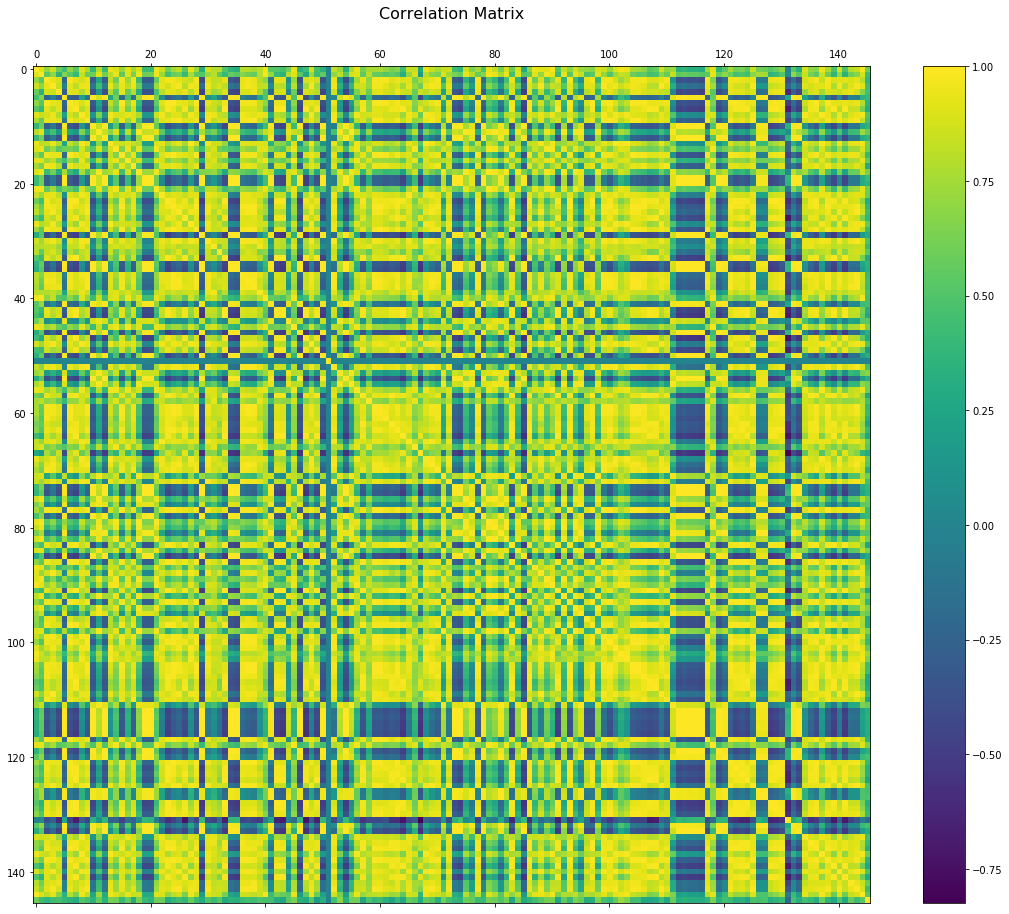

In [59]:
f = plt.figure(figsize=(19, 15))
plt.matshow(pivoted_GDP_df.corr(), fignum=f.number)
cb = plt.colorbar()
cb.ax.tick_params()
plt.title('Correlation Matrix', fontsize=16);

We then try to clusterize this correlation matrix in order to find countries whose GDP are correlated:

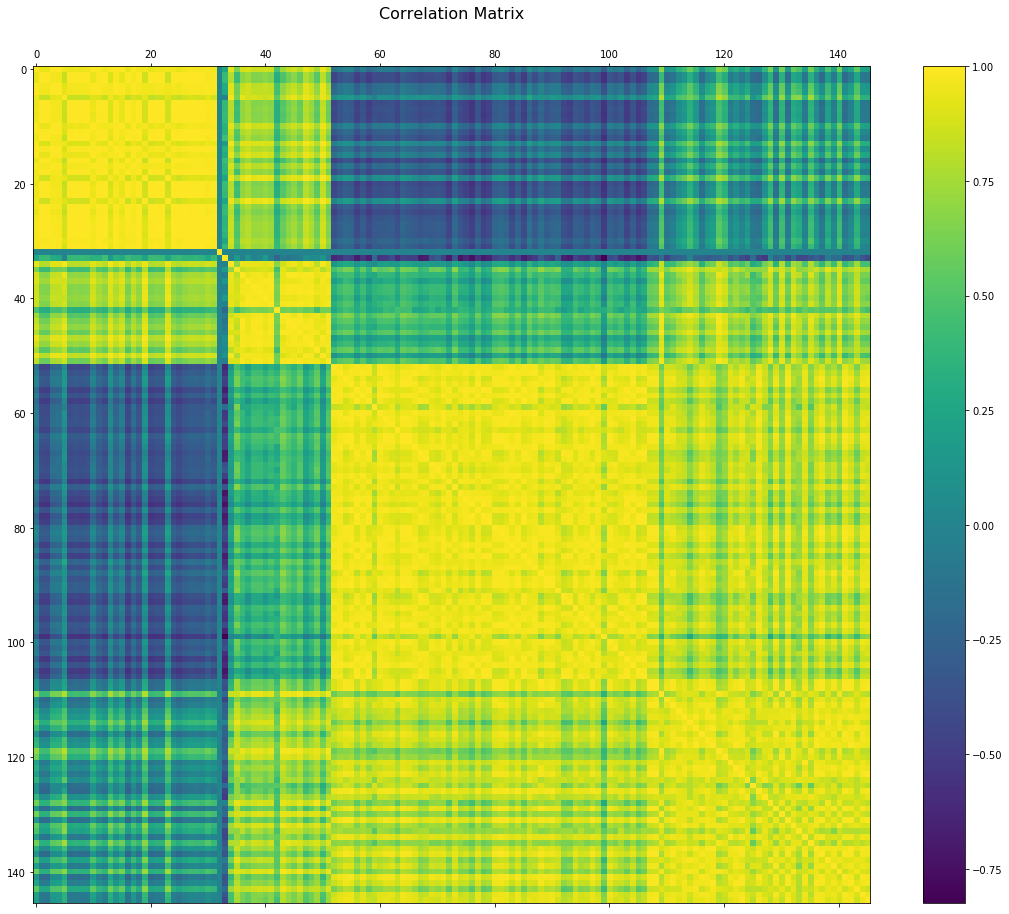

In [60]:
corr = pivoted_GDP_df.corr().values
pdist = spc.distance.pdist(corr)   # vector of ('55' choose 2) pairwise distances
linkage = spc.linkage(pdist, method='complete')
ind = spc.fcluster(linkage, 0.5*pdist.max(), 'distance')
columns = [pivoted_GDP_df.columns.tolist()[i] for i in list((np.argsort(ind)))]
clusterised_df = pivoted_GDP_df.reindex(columns, axis=1)

f = plt.figure(figsize=(19, 15))
plt.matshow(clusterised_df.corr(), fignum=f.number)
cb = plt.colorbar()
cb.ax.tick_params()
plt.title('Correlation Matrix', fontsize=16);

We have found 4 regions in which the GDP is highly correlated and between which the correlation coefficent is lower. We could refine the big clusters by iterating this method.

**Interpretation:** The correlation matrix of GDP contains lots of values that are very closed to one. This means that GDP in two different countries have a trend to evolve the same way. Therefore, we can say that the world countries have strong enough trading relations to make the GDP evolve the same way. The fact that we have found some main clusters could be interpreted as regions in which the trading relations are more important.

#### 2.D. Economic classification of countries <a name="2D"></a>

In [61]:
plot = uni_df[['Area','Year']]
plot["Value"] = uni_df["(GDP, million $)"]
for year in range(1980, 2015, 5):
    display(year, visualise_world_data_folium(plot, year, True))

1980

1985

1990

1995

2000

2005

2010

### 3. Descriptive data analysis  <a name="3"></a>

3. 

    1. [Production and consumption of food from a time-space geography point of view](#3A)
        
        1. [Net food exporters or importers](#3Aa)
        
        2. [Evolution over the last few decades](#3Ab)

    1. [Food self-sufficiency](#3B)

    2. [Giving countries an economic score based on their agricultural features](#3C)
        
        1. [Correlation between food trade feature and GDP](#3Ca)
        
        2. [Our own score](#3Cb)
        
        2. [Machine learning model](#3Cc)  

    3. [Food prices stability and agricultural features](#3C)  
    
TODO

### 4. Informed plan for next actions  <a name="4"></a>

Our results seem pretty intersting to share to the world. Moreover we have nice interactive maps and we would like to focus more on visual and style than writting on methodology. Therefore, we would like to produce a data story.
